(-0.5, 687.5, 346.5, -0.5)

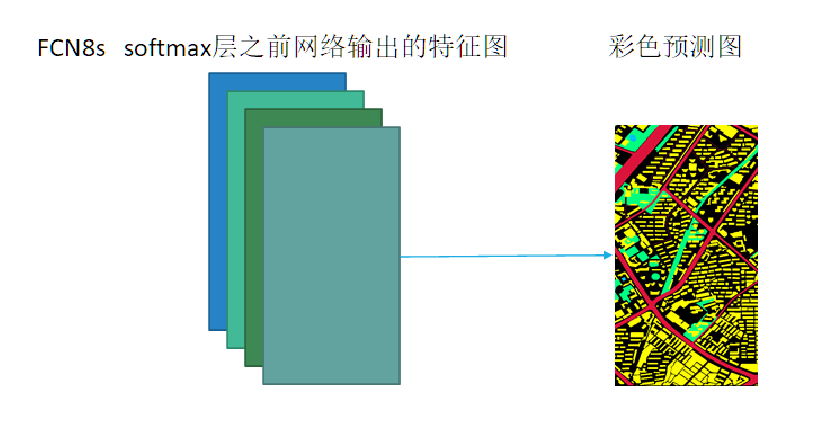

## 本文讲述的是FCN8s softmax层之前输出的特征图，如何变为预测图

In [1]:

# FCN 最后一层接softmax并预测 原理讲解

# example:
# ---------
#     输入描述：
#         FCN 最后一层输出尺寸  eg： 1*3*4*4  ===>即 1张 3通道的 4*4特征图
#         可知通道数，即为分类数，即有多少个分类。
#         每个通道的编号对应一个分类。
#         
#     输出描述：
#         通过，FCN网咯得到的预测分数图，变为一张可视化的图片，即网络的预测的最终结果
#     
#     目的：
#         将输入和输出的过程，用程序一步一步实现 

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # 防止jupter服务挂了

import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
# 模拟  预测图生成
pre_label = torch.randn(1,3,4,4) # 一张3通道，4 * 4 的图片。  每个通道对应一个分类。
pre_label

tensor([[[[-0.6992,  0.5492,  0.6615,  1.3042],
          [-1.4143,  0.9062,  0.2197, -0.3052],
          [ 1.2733,  0.3284,  1.1623,  1.0637],
          [-0.0313, -0.6160, -0.0122, -0.4299]],

         [[ 0.6164, -0.2218,  0.6222,  0.2417],
          [ 0.7219, -0.4449, -0.2688, -0.1846],
          [-0.5712, -0.3094,  1.8387,  0.3433],
          [-0.2889,  0.2255,  0.3556, -0.1865]],

         [[ 1.7383, -0.3165,  1.4107,  0.9335],
          [ 0.2647,  0.1661, -1.0531,  0.1479],
          [ 1.3052, -1.6470, -0.7870, -1.1018],
          [ 1.3137, -0.2905,  0.8465, -2.0443]]]])

In [4]:
# 取这张预测图片 (x,y) 像素点处，在每个通道中的最大值  w,h,n
pre_label.max(1)
torch.max()

torch.return_types.max(
values=tensor([[[ 1.7383,  0.5492,  1.4107,  1.3042],
         [ 0.7219,  0.9062,  0.2197,  0.1479],
         [ 1.3052,  0.3284,  1.8387,  1.0637],
         [ 1.3137,  0.2255,  0.8465, -0.1865]]]),
indices=tensor([[[2, 0, 2, 0],
         [1, 0, 0, 2],
         [2, 0, 1, 0],
         [2, 1, 2, 1]]]))

In [5]:
# 取其下标对应的通道编号
# 已知每个通道编号，便是一个分类。所以取其通道号
pre = pre_label.max(1)[1]
print(pre.shape)
print(pre)

torch.Size([1, 4, 4])
tensor([[[2, 0, 2, 0],
         [1, 0, 0, 2],
         [2, 0, 1, 0],
         [2, 1, 2, 1]]])


In [6]:
# 将上一步的结果，变为2维tensor.
# 目的：降维使其变为2维tensor
pre = pre_label.max(1)[1].squeeze()
print(pre.shape)
print(pre)

torch.Size([4, 4])
tensor([[2, 0, 2, 0],
        [1, 0, 0, 2],
        [2, 0, 1, 0],
        [2, 1, 2, 1]])


In [7]:
# 变成numpy数组，方便可视化为图片
pre = pre_label.max(1)[1].squeeze().data.numpy()
pre

array([[2, 0, 2, 0],
       [1, 0, 0, 2],
       [2, 0, 1, 0],
       [2, 1, 2, 1]], dtype=int64)

In [8]:
# 可视化上一步的这个矩阵   变为有颜色的预测图

# 已知
#      1.上面每个元素对应一个通道号
#      2.一个通道号对应一个分类
#      3.一个分类，对应一个RGB值

# 这一步目的：
#        那我么这一步所作的事，就是将每个通道号变为图片上的RGB值，变为3通道的图片
#        简单的说就是 将一个整数 映射 为RGB 3个分量

# 步骤 1. 得到映射 关系
#       已知
#      (0) ==> Background->(0,0,0), (1)==>Vegetation->(0,255,127), (2)==>Roads->(220,20,60),(3)==>Building->(255,255,0), 
#         (4)==> River->(0,191,255)
#       color = [[0,0,0],[0,255,127],[220,20,60],[255,255,0],[0,191,255]]

color = [[0,0,0],[0,255,127],[220,20,60],[255,255,0],[0,191,255]]
colormap = np.array(color).astype('uint8')
# 得到颜色矩阵
colormap

array([[  0,   0,   0],
       [  0, 255, 127],
       [220,  20,  60],
       [255, 255,   0],
       [  0, 191, 255]], dtype=uint8)

In [9]:
# 这就是将整数替换成颜色后的结果
resultmap = colormap[pre]   # 其实这里用的映射原理是 resultmap[0][0] = colormap[  pre[0][0] ]

print(resultmap.shape,'这个图片是',resultmap.shape[2],'维的，大小为: w = ',resultmap.shape[0],'h = ',resultmap.shape[1])
print(resultmap)

(4, 4, 3) 这个图片是 3 维的，大小为: w =  4 h =  4
[[[220  20  60]
  [  0   0   0]
  [220  20  60]
  [  0   0   0]]

 [[  0 255 127]
  [  0   0   0]
  [  0   0   0]
  [220  20  60]]

 [[220  20  60]
  [  0   0   0]
  [  0 255 127]
  [  0   0   0]]

 [[220  20  60]
  [  0 255 127]
  [220  20  60]
  [  0 255 127]]]


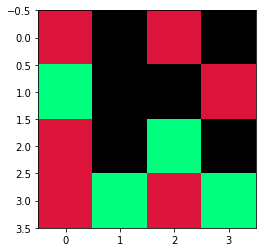

In [10]:
# 可视化
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


pre = Image.fromarray(resultmap)

plt.imshow(pre)

In [ ]:
#是不是刚好对应于上述  第七个框框得到的矩阵啊

# array([[2, 0, 2, 0],
#        [1, 0, 0, 2],
#        [2, 0, 1, 0],
#        [2, 1, 2, 1]], dtype=int64)